# Data Processing 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

### Import file to pandas

### `data = pd.read_filetype ("File name.filetype")`

In [2]:
data = pd.read_csv("Salary_Data.csv")

In [3]:
data = data[(data["Gender"]== "Male") | (data["Gender"] == "Female")]


## 1. Get Data Information

### 1.1. Type Information


### `Df.info()`

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6688 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6688 non-null   float64
 1   Gender               6688 non-null   object 
 2   Education Level      6687 non-null   object 
 3   Job Title            6688 non-null   object 
 4   Years of Experience  6687 non-null   float64
 5   Salary               6685 non-null   float64
dtypes: float64(3), object(3)
memory usage: 365.8+ KB


### 1.2. Get Statistic Data Information



### `Df.describe()`

In [5]:
data.describe()

,Age,Years of Experience,Salary
count,6688.000000,6687.000000,6685.000000
mean,33.608403,8.076940,115304.885415
std,7.594846,6.028222,52803.192388
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


## 2. Handling Missing Value

### Get Missing Value Information

### `data.isna().sum()`

In [6]:
data.isna().sum()

Age                    0
Gender                 0
Education Level        1
Job Title              0
Years of Experience    1
Salary                 3
dtype: int64

### 2.1. Drop Technique  

### `data = data.dropna()`

In [7]:
data = data.dropna()

In [8]:
data.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

### 2.2. Statistical Technique

#### Menggunakan data histogram untuk mengetahui distribusi data (Normal/ Rex Q/ Labs Skew/ Bimodal)

### `data.hist()`

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Years of Experience'}>],
       [<Axes: title={'center': 'Salary'}>, <Axes: >]], dtype=object)

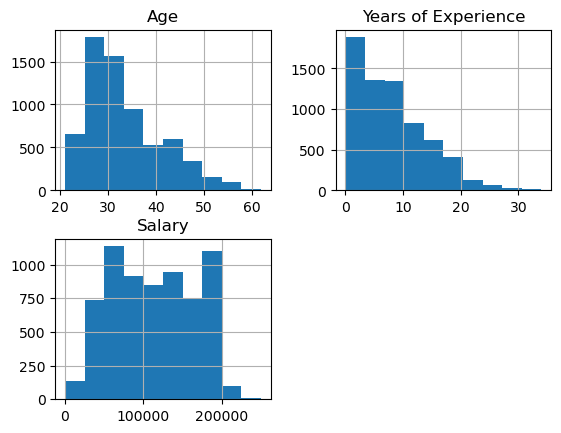

In [9]:
data.hist()

#### Dari histogram diketahui Age dan Years of Experience mempunyai REX Q / POSITIVE distribution dimana MEDIAN lebih tepat untuk replacing missing value 

#### Sedangkan Salary mempunyai NORMAL distribution dimana MEAN lebih tepat untuk replacing missing value 

#### Using MEAN to fill the missing value on Salary data


### Replace Only For Specified Columns
### `data["column name"] = data["column name"].fillna(data["column name"].mean/median/mode ( ) )`

In [10]:
data["Salary"] = data["Salary"].fillna(data["Salary"].mean())

#### Using MEDIAN to fill the missing value on Age and Years of Experience

In [11]:
data["Age"] = data["Age"].fillna(data["Age"].median())

In [12]:
data["Years of Experience"] = data["Years of Experience"].fillna(data["Years of Experience"].median())

#### Using loop to fill the missing data with statistical technique

In [13]:
list_column = ["Salary", "Age", "Years of Experience"]

for i in list_column:
    if i == "Salary":
        data[i] = data[i].fillna(data[i].mean())
    elif i== "Age" or i== "Years of Experience":
        data[i] = data[i].fillna(data[i].median())

## 3. Handling Inconsistance Data

####  Pada contoh colum Educational lever terdapat inconsitency pada data gelar ex: "Bachelor's" dan "Bachelor's Degree",  "Master's" dan "Master's Degree", 'PhD' dan 'phD'.

In [14]:
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,3.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


### a. Get Unique / Disticnt Data Infromation (to observe inconsitance data)

### `data["row title"].unique()`

In [15]:
data["Education Level"].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

### b. Change Inconsistance Data 

### `data.iterrows()`

get a single value from a dataframe based on the row index and column name
### `data.at[rowIndex,columLabel]`

In [16]:
for row, column in data.iterrows():
    if column["Education Level"] == "Bachelor's Degree":
        data.at[row,"Education Level"] = "Bachelor's"
    elif column["Education Level"] == "Master's Degree":
        data.at[row,"Education Level"] = "Master's"
    elif column["Education Level"] == "phD":
        data.at[row,"Education Level"] = "PhD"
    

In [17]:
data["Education Level"].unique()

array(["Bachelor's", "Master's", 'PhD', 'High School'], dtype=object)

In [18]:
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,3.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's,Marketing Manager,14.0,140000.0


In [19]:
data["Gender"].unique()

array(['Male', 'Female'], dtype=object)

#### Get Total Amout Unique / Disticnt Data

### `len(data["row title"].unique())`

In [20]:
len(data["Job Title"].unique())

191

## 4. Encoding Data
#### Data encoding is changing raw data into a binary format that an algorithm can read and interpret. Encoding enables computers to process and transmit information that is not numerical-based

###  Numerical data 
is information that is something that is measurable. It is always collected in number form

In [21]:
numerical_data = data[["Age","Gender","Years of Experience", "Salary" ]]

In [22]:
numerical_data

,Age,Gender,Years of Experience,Salary
0,32.0,Male,3.0,90000.0
1,28.0,Female,3.0,65000.0
2,45.0,Male,15.0,150000.0
3,36.0,Female,7.0,60000.0
4,52.0,Male,20.0,200000.0
...,...,...,...,...
6699,49.0,Female,20.0,200000.0
6700,32.0,Male,3.0,50000.0
6701,30.0,Female,4.0,55000.0
6702,46.0,Male,14.0,140000.0


### Nominal Data
Nominal data are used to label variables without any quantitative value. Common examples include gender, hair color, nationalities, names of people, and so on

In [23]:
nominal_data = data["Job Title"]
nominal_data

0           Software Engineer
1                Data Analyst
2              Senior Manager
3             Sales Associate
4                    Director
                ...          
6699    Director of Marketing
6700          Sales Associate
6701        Financial Manager
6702        Marketing Manager
6703          Sales Executive
Name: Job Title, Length: 6684, dtype: object

### 4.1. Convert categorical variable (Nominal Data) into dummy/indicator variables

Each variable is converted in as many 0/1 variables as there are different values. Columns in the output are each named after a value; if the input is a DataFrame, the name of the original variable is prepended to the value.

### `pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False,`
### `columns=None, sparse=False, drop_first=False, dtype=None)`

### Parameter`

data
array-like, Series, or DataFrame
Data of which to get dummy indicators.

prefix
str, list of str, or dict of str, default None
String to append DataFrame column names. Pass a list with length equal to the number of columns when calling get_dummies on a DataFrame. Alternatively, prefix can be a dictionary mapping column names to prefixes.

prefix_sep
str, default ‘_’
If appending prefix, separator/delimiter to use. Or pass a list or dictionary as with prefix.

dummy_na
bool, default False
Add a column to indicate NaNs, if False NaNs are ignored.

columns
list-like, default None
Column names in the DataFrame to be encoded. If columns is None then all the columns with object, string, or category dtype will be converted.

sparse
bool, default False
Whether the dummy-encoded columns should be backed by a SparseArray (True) or a regular NumPy array (False).

drop_first
bool, default False
Whether to get k-1 dummies out of k categorical levels by removing the first level.

dtype
dtype, default bool
Data type for new columns. Only a single dtype is allowed.

In [24]:
nominal_data = pd.get_dummies(nominal_data,dtype="int")
nominal_data

,Account Manager,Accountant,Administrative Assistant,Back end Developer,Business Analyst,Business Development Manager,Business Intelligence Analyst,CEO,Chief Data Officer,Chief Technology Officer,...,Supply Chain Manager,Technical Recruiter,Technical Support Specialist,Technical Writer,Training Specialist,UX Designer,UX Researcher,VP of Finance,VP of Operations,Web Developer
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6699,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6700,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6701,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6702,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
nominal_data[nominal_data["Software Engineer"] == 1]

,Account Manager,Accountant,Administrative Assistant,Back end Developer,Business Analyst,Business Development Manager,Business Intelligence Analyst,CEO,Chief Data Officer,Chief Technology Officer,...,Supply Chain Manager,Technical Recruiter,Technical Support Specialist,Technical Writer,Training Specialist,UX Designer,UX Researcher,VP of Finance,VP of Operations,Web Developer
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
376,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
380,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
384,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
388,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6191,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6219,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Ordinal Data
It is categorical data that can be ranked or ordered in accordance with a specific attribute or characteristic. Examples of ordinal data are the level of education, the range of income, or the grades.

In [26]:
ordinal_data = data ["Education Level"]
ordinal_data.unique()
category_order  = ["High School", "Bachelor's", "Master's", "PhD"]

### 4.2. Convert Categorical Data with Encoder

In [27]:
ordinal_encoder = OrdinalEncoder(categories = [category_order])
ordinal_data = ordinal_data.values.reshape(-1,1)
encoded_data = ordinal_encoder.fit_transform(ordinal_data)
data["Education Level Encoded"]= encoded_data
ordinal_data_final = data[["Education Level Encoded"]]
ordinal_data_final

,Education Level Encoded
0,1.0
1,2.0
2,3.0
3,1.0
4,2.0
...,...
6699,3.0
6700,0.0
6701,1.0
6702,2.0


## Join by Index


In [28]:
merging_data_1 = pd.merge(numerical_data,nominal_data, left_index = True, right_index = True)
merging_data_1

,Age,Gender,Years of Experience,Salary,Account Manager,Accountant,Administrative Assistant,Back end Developer,Business Analyst,Business Development Manager,...,Supply Chain Manager,Technical Recruiter,Technical Support Specialist,Technical Writer,Training Specialist,UX Designer,UX Researcher,VP of Finance,VP of Operations,Web Developer
0,32.0,Male,3.0,90000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,28.0,Female,3.0,65000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,45.0,Male,15.0,150000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36.0,Female,7.0,60000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,52.0,Male,20.0,200000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6699,49.0,Female,20.0,200000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6700,32.0,Male,3.0,50000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6701,30.0,Female,4.0,55000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6702,46.0,Male,14.0,140000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
final_data = pd.merge(ordinal_data_final,merging_data_1,left_index = True, right_index = True )

In [30]:
final_data 

,Education Level Encoded,Age,Gender,Years of Experience,Salary,Account Manager,Accountant,Administrative Assistant,Back end Developer,Business Analyst,...,Supply Chain Manager,Technical Recruiter,Technical Support Specialist,Technical Writer,Training Specialist,UX Designer,UX Researcher,VP of Finance,VP of Operations,Web Developer
0,1.0,32.0,Male,3.0,90000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,28.0,Female,3.0,65000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,45.0,Male,15.0,150000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,36.0,Female,7.0,60000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,52.0,Male,20.0,200000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6699,3.0,49.0,Female,20.0,200000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6700,0.0,32.0,Male,3.0,50000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6701,1.0,30.0,Female,4.0,55000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6702,2.0,46.0,Male,14.0,140000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## E. Handling Outlier using IQR

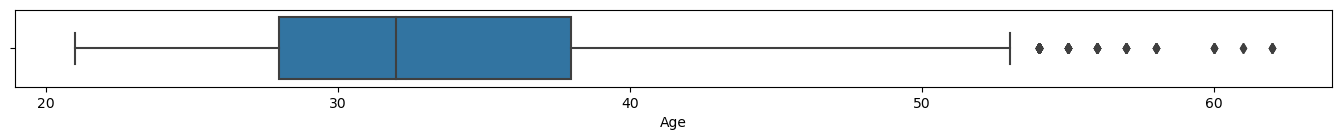

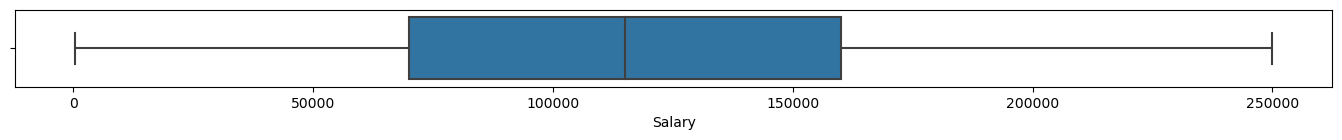

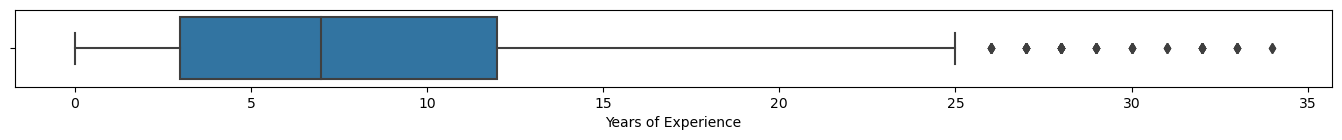

In [31]:
for i in final_data [["Age", "Salary", "Years of Experience"]]:
    plt.figure(figsize=(17,1))
    sns.boxplot(data= final_data [["Age", "Salary", "Years of Experience"]], x=i)

In [32]:
"""
method = "remove"

for i in ["Age", "Years of Experience"]:
    q1=final_data[i].quantile(0.25)
    q3=final_data[i].quantile(0.75)
    iqr = q3-q1
    upper_bound = q3 + (1.5*iqr)
    lower_bound = q1 - (1.5*iqr)
    if method == "remove" :
        final_data = final_data[(final_data[i]>lower_bound) & (final_data[i]<upper_bound)]
    elif method =="trim":
        final_data[i] = final_data[i].clip(lower =lower_bound, upper = upper_bound)
    
"""        
    

'\nmethod = "remove"\n\nfor i in ["Age", "Years of Experience"]:\n    q1=final_data[i].quantile(0.25)\n    q3=final_data[i].quantile(0.75)\n    iqr = q3-q1\n    upper_bound = q3 + (1.5*iqr)\n    lower_bound = q1 - (1.5*iqr)\n    if method == "remove" :\n        final_data = final_data[(final_data[i]>lower_bound) & (final_data[i]<upper_bound)]\n    elif method =="trim":\n        final_data[i] = final_data[i].clip(lower =lower_bound, upper = upper_bound)\n    \n'

In [33]:
def handle_outlier (column, data, method):

    for i in column:
        q1=data[i].quantile(0.25)
        q3=data[i].quantile(0.75)
        iqr = q3-q1
        upper_bound = q3 + (1.5*iqr)
        lower_bound = q1 - (1.5*iqr)
        outlier = data [(data[i] < lower_bound) | (data[i]>upper_bound)] 
        print("jumlah outlier column",i,":",len(outlier),"dengan persentasi:", len(outlier)/len(data[i]))
        if method == "remove" :
            data = data[(data[i]>=lower_bound) & (data[i]<=upper_bound)]
        elif method =="trim":
            data[i] = data[i].clip(lower =lower_bound, upper = upper_bound)
    return(data)


final_data = handle_outlier (["Age","Years of Experience"], final_data, "remove")

jumlah outlier column Age : 119 dengan persentasi: 0.017803710353081988
jumlah outlier column Years of Experience : 23 dengan persentasi: 0.0035034272658035033


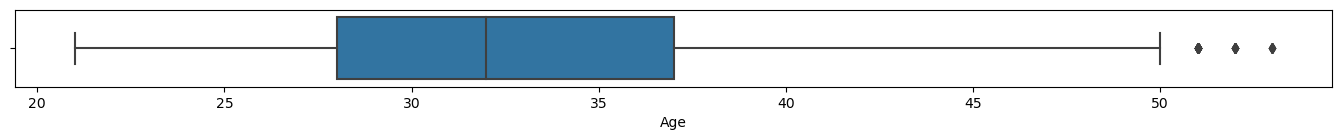

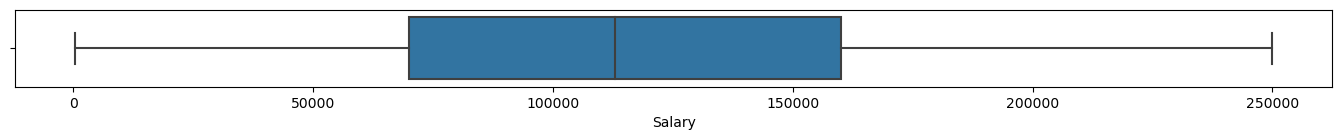

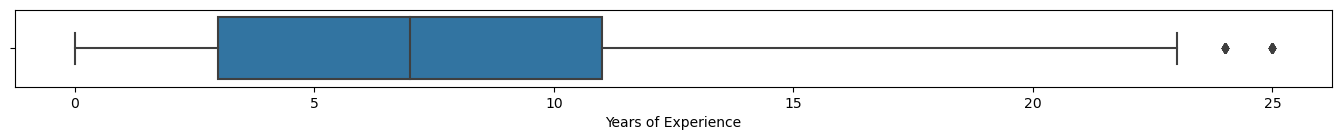

In [34]:
for i in final_data [["Age", "Salary", "Years of Experience"]]:
    plt.figure(figsize=(17,1))
    sns.boxplot(data= final_data [["Age", "Salary", "Years of Experience"]], x=i)

## F. Train Test Split


In [35]:
final_data

,Education Level Encoded,Age,Gender,Years of Experience,Salary,Account Manager,Accountant,Administrative Assistant,Back end Developer,Business Analyst,...,Supply Chain Manager,Technical Recruiter,Technical Support Specialist,Technical Writer,Training Specialist,UX Designer,UX Researcher,VP of Finance,VP of Operations,Web Developer
0,1.0,32.0,Male,3.0,90000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,28.0,Female,3.0,65000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,45.0,Male,15.0,150000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,36.0,Female,7.0,60000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,52.0,Male,20.0,200000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6699,3.0,49.0,Female,20.0,200000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6700,0.0,32.0,Male,3.0,50000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6701,1.0,30.0,Female,4.0,55000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6702,2.0,46.0,Male,14.0,140000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
x= final_data.drop(columns = "Gender") #independent variable
y = final_data["Gender"]

In [37]:
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=24) #0.2 utk test , 0.8 utk train, scr random

In [38]:
x_train

,Education Level Encoded,Age,Years of Experience,Salary,Account Manager,Accountant,Administrative Assistant,Back end Developer,Business Analyst,Business Development Manager,...,Supply Chain Manager,Technical Recruiter,Technical Support Specialist,Technical Writer,Training Specialist,UX Designer,UX Researcher,VP of Finance,VP of Operations,Web Developer
3846,2.0,26.0,3.0,50000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3105,1.0,30.0,5.0,100151.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6386,3.0,48.0,17.0,170000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3087,3.0,48.0,23.0,188288.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4655,2.0,33.0,8.0,120000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3633,2.0,36.0,7.0,85000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
345,1.0,33.0,4.0,60000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6498,1.0,23.0,1.0,35000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
901,1.0,27.0,4.0,140000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
y_train

3846    Female
3105    Female
6386    Female
3087      Male
4655      Male
         ...  
3633    Female
345       Male
6498      Male
901       Male
4674    Female
Name: Gender, Length: 5233, dtype: object

In [40]:
x_test

,Education Level Encoded,Age,Years of Experience,Salary,Account Manager,Accountant,Administrative Assistant,Back end Developer,Business Analyst,Business Development Manager,...,Supply Chain Manager,Technical Recruiter,Technical Support Specialist,Technical Writer,Training Specialist,UX Designer,UX Researcher,VP of Finance,VP of Operations,Web Developer
4362,1.0,35.0,8.0,92000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3229,2.0,25.0,2.0,60000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1504,2.0,27.0,2.0,70000.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4673,3.0,35.0,10.0,130000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1106,2.0,31.0,9.0,185000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024,0.0,24.0,1.0,25000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1639,2.0,37.0,9.0,150000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1477,3.0,48.0,16.0,190000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6698,1.0,37.0,6.0,75000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
y_test

4362    Female
3229    Female
1504    Female
4673      Male
1106      Male
         ...  
4024      Male
1639      Male
1477      Male
6698      Male
3045    Female
Name: Gender, Length: 1309, dtype: object

## H. Handling Imbalance Data

In [42]:
y_train.value_counts()

Gender
Male      2876
Female    2357
Name: count, dtype: int64

### 1. Random Under Sampler

In [43]:
under_sampler = RandomUnderSampler ()
x_train_resample, y_train_resample = under_sampler.fit_resample(x_train,y_train)
y_train_resample.value_counts()

Gender
Female    2357
Male      2357
Name: count, dtype: int64

In [44]:
x_train_resample

,Education Level Encoded,Age,Years of Experience,Salary,Account Manager,Accountant,Administrative Assistant,Back end Developer,Business Analyst,Business Development Manager,...,Supply Chain Manager,Technical Recruiter,Technical Support Specialist,Technical Writer,Training Specialist,UX Designer,UX Researcher,VP of Finance,VP of Operations,Web Developer
3846,2.0,26.0,3.0,50000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3105,1.0,30.0,5.0,100151.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6386,3.0,48.0,17.0,170000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2861,1.0,45.0,21.0,167015.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019,3.0,43.0,14.0,190000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2407,2.0,33.0,8.0,139817.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
704,1.0,31.0,9.0,195000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5694,1.0,27.0,3.0,80000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5503,1.0,31.0,6.0,100000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
x_train

,Education Level Encoded,Age,Years of Experience,Salary,Account Manager,Accountant,Administrative Assistant,Back end Developer,Business Analyst,Business Development Manager,...,Supply Chain Manager,Technical Recruiter,Technical Support Specialist,Technical Writer,Training Specialist,UX Designer,UX Researcher,VP of Finance,VP of Operations,Web Developer
3846,2.0,26.0,3.0,50000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3105,1.0,30.0,5.0,100151.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6386,3.0,48.0,17.0,170000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3087,3.0,48.0,23.0,188288.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4655,2.0,33.0,8.0,120000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3633,2.0,36.0,7.0,85000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
345,1.0,33.0,4.0,60000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6498,1.0,23.0,1.0,35000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
901,1.0,27.0,4.0,140000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2. Random Over Sampling

In [46]:
over_sampler = RandomOverSampler ()
x_train_resample, y_train_resample = over_sampler.fit_resample(x_train,y_train)

In [47]:
x_train_resample

,Education Level Encoded,Age,Years of Experience,Salary,Account Manager,Accountant,Administrative Assistant,Back end Developer,Business Analyst,Business Development Manager,...,Supply Chain Manager,Technical Recruiter,Technical Support Specialist,Technical Writer,Training Specialist,UX Designer,UX Researcher,VP of Finance,VP of Operations,Web Developer
0,2.0,26.0,3.0,50000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,30.0,5.0,100151.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,48.0,17.0,170000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,48.0,23.0,188288.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,33.0,8.0,120000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5747,1.0,24.0,2.0,55000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5748,2.0,27.0,3.0,60000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5749,1.0,28.0,2.0,36000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5750,2.0,41.0,11.0,165000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
y_train_resample.value_counts()

Gender
Female    2876
Male      2876
Name: count, dtype: int64

### 3. SMOTE

In [49]:
smote_sampler = SMOTE ()
x_train_resample, y_train_resample = smote_sampler.fit_resample(x_train,y_train) 

## I. Scaling and Normalisation

### 1. Standard Scaler

-  Mengarahkan ke normal distribusi
-  Less sensitive
-  Using Zscore 

In [50]:
standard_scaler = StandardScaler()
x_train_scaler = standard_scaler.fit_transform(x_train_resample)
x_test_scaler = standard_scaler.transform(x_test)
x_test_scaler 

array([[-0.69304177,  0.27904951,  0.05764957, ..., -0.01318646,
        -0.01318646, -0.11494   ],
       [ 0.46129892, -1.16989798, -1.02875332, ..., -0.01318646,
        -0.01318646, -0.11494   ],
       [ 0.46129892, -0.88010849, -1.02875332, ..., -0.01318646,
        -0.01318646, -0.11494   ],
       ...,
       [ 1.61563962,  2.16268124,  1.50618676, ..., -0.01318646,
        -0.01318646, -0.11494   ],
       [-0.69304177,  0.568839  , -0.30448473, ..., -0.01318646,
        -0.01318646, -0.11494   ],
       [ 0.46129892,  2.45247074,  2.95472395, ..., -0.01318646,
        -0.01318646, -0.11494   ]])

### 2. MIN MAX Scaler

-  Sensitive with outliers
-  Better not using it when lots of outliers
-  x_scale = x_i - x_min / xmax - xmin

minmax_scaler = MinMaxScaler()
x_train_scaler = minmax_scaler.fit_transform(x_train_resample)
x_test_scaler = minmax_scaler.transform(x_test)

### 3.Robust Scaler
- Scale features using statistics that are robust to outliers
- x_scale = x_i - x_median / IQR


robust_scaler = RobustScaler()
x_train_scaler = robust_scaler.fit_transform(x_train_resample)
x_test_scaler = robust_scaler.transform(x_test)

## Machine Learning

prediksi

In [51]:
rf_classifier = RandomForestClassifier()

In [52]:
rf_classifier

RandomForestClassifier()

In [53]:
rf_classifier.fit(x_train_scaler,y_train_resample)

RandomForestClassifier()

In [54]:
y_prediction = rf_classifier.predict(x_test_scaler)

In [55]:
y_prediction

array(['Female', 'Female', 'Female', ..., 'Male', 'Male', 'Female'],
      dtype=object)

In [56]:
y_test

4362    Female
3229    Female
1504    Female
4673      Male
1106      Male
         ...  
4024      Male
1639      Male
1477      Male
6698      Male
3045    Female
Name: Gender, Length: 1309, dtype: object

In [57]:
y_prediction.shape

(1309,)

In [58]:
accuracy = accuracy_score(y_test,y_prediction)
accuracy

0.922077922077922

## Evaluation Matrix

### Confusion Matrix

In [59]:
def confusion_matrix_display(y_true, y_pred):
    labels = y_true.unique() 
    print(f'Accuracy score: {accuracy_score(y_true, y_pred)} ')
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

Accuracy score: 0.922077922077922 
              precision    recall  f1-score   support

      Female       0.92      0.92      0.92       622
        Male       0.93      0.93      0.93       687

    accuracy                           0.92      1309
   macro avg       0.92      0.92      0.92      1309
weighted avg       0.92      0.92      0.92      1309



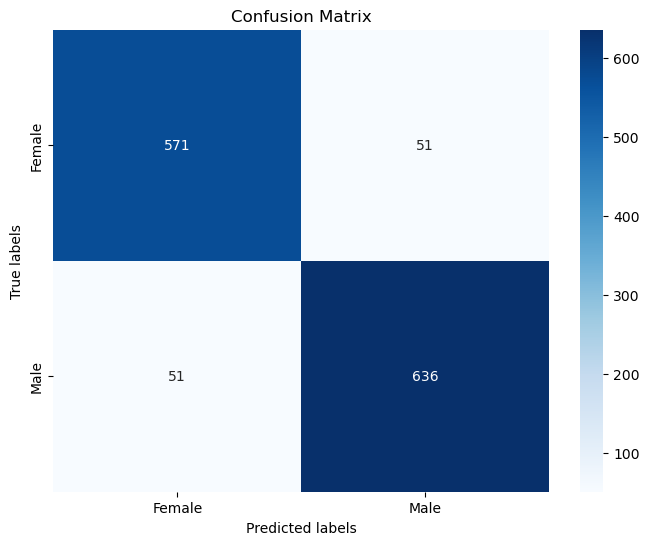

In [60]:
confusion_matrix_display(y_test,y_prediction)